# MA336: Artificial intelligence and machine learning with applications

Name: Pavan Chandra

Reg No: 2401073

Course: MA336: Artificial intelligence and machine learning with applications

**Problem Context:** In today's digital economy, Financial transaction fraud is a serious problem for both consumers and enterprises since it may result in large financial losses as well as harm to one's reputations. Advanced fraud detection techniques are becoming more and more necessary as cybercriminals keep changing their strategies in order to successfully counter these threats. In this sense, machine learning (ML) has become a potent remedy, providing advanced methods for identifying and stopping financial transaction fraud.
 Identity theft, credit card fraud, and account takeovers are just a few of the fraudulent activities that fall under the category of financial transaction fraud. In addition to causing monetary losses, these fraudulent activities damage public confidence in financial institutions and interfere with the regular operation of the financial markets.

**Aim:** The goal of this assignment is to implement a machine learning algorithm to predict accurately the fraudulent transactions from the historical transaction data, in order to prevent future fraudlent transaction in real-time, minimizing financial losses and mitigating risks to businesses and consumers.

**Dataset description:** The dataset which we are using for this assignment is download from hugging face website.

The link for the dataset : [Hugging Face : Credit Card Transactions](https://huggingface.co/datasets/pointe77/credit-card-transaction)

The dataset contains historical transactions from 2019 to 2020 which include personal information of consumers and originzation informations and transactions details.

the columns in the credit card transaction dataset are :
* **trans_date_trans_time** : date and time of transactions
* **cc_num**                : Account number of consumer
* **merchant**              : Origination Name
* **category**              : Category of the consumer
* **amt**                   : Amout of transactions
* **first**                 : First name of the consumer
* **last**                  : last name of the consumer
* **gender**                : gender of the consumer
* **street**                : street of the consumer
* **city**                  : city of the consumer
* **state**                 : state of the consumer
* **zip**                   : postal code of the consumer
* **lat**                   : latitude of the consumer
* **long**                  : longitude of the consumer
* **city_pop**              : city number of the consumer
* **job**                   : occupation of the consumer
* **dob**                   : date of birth of the consumer
* **trans_num**             : transaction number of the consumer
* **unix_time**             : unix time 
* **merch_lat**             : latitude of the merchant
* **merch_long**            : longitude of the merchant
* **is_fraud**              : fraud transaction or non fraud transaction
* **merch_zipcode**         : postal code of the merchant

Importing Libraries

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime as dt
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.backend import clear_session

Ignoring warnings

In [129]:
warnings.filterwarnings("ignore")

### Downloading DataSet From Hugging Face

In [130]:
splits = {'train': 'credit_card_transaction_train.csv', 'test': 'credit_card_transaction_test.csv'}

cc_trans_df = pd.read_csv("hf://datasets/pointe77/credit-card-transaction/" + splits["train"])

Removing Unwanted column 

In [131]:
cc_trans_df = cc_trans_df.drop(columns = 'Unnamed: 0')

Saving dataset to local storage 

pd.to_csv(r'C:\pavan\essex_material\ma336_al_ml\assignment\original_dataset.csv', index= False)

### Importing the dataset and preview

cc_trans_df = pd.read_csv(r'C:\pavan\essex_material\ma336_al_ml\assignment\original_dataset.csv')

cc_trans_df = cc_trans_df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0'])

In [132]:
print('Preview of the credit card transaction dataset:\n')
print(cc_trans_df.head())

Preview of the credit card transaction dataset:

  trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      long  city_pop  \
0                561 Perry Cove  Moravian Falls  ...  -81

### Information of the Credit Card Transaction Dataset

In [133]:
print('The Information of Credit Card Transaction Dataset:\n')
print(cc_trans_df.info())

The Information of Credit Card Transaction Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long               

### Summary of the Dataset

In [134]:
print('The summary of the dataset:\n')
print(cc_trans_df.describe())

The summary of the dataset:

             cc_num           amt           zip           lat          long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01 -9.022634e+01   
std    1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00  1.375908e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01 -9.679800e+01   
50%    3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01  5.788652e-03   
std    3.019564e+05  1

# Visualizing the data

#### Imbalance dataset

The distribution of fraud vs non-fraud transactions:

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


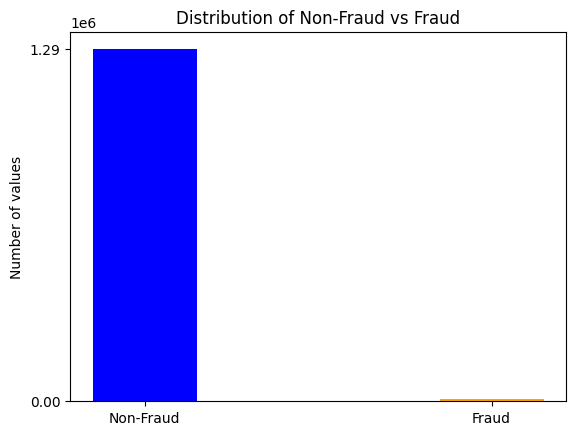

In [135]:
print('The distribution of fraud vs non-fraud transactions:\n') 
print(cc_trans_df.is_fraud.value_counts())
# plotting bar graph for fraud vs non fraud cases
fig, ax = plt.subplots(1,1)
width = 0.3
ax.bar(cc_trans_df.is_fraud.unique(),cc_trans_df.is_fraud.value_counts(), width, tick_label=['Non-Fraud','Fraud'], color = ['blue', 'orange'])
ax.set_yticks([0, 1289169])
ax.set_ylabel('Number of values')
ax.set_title('Distribution of Non-Fraud vs Fraud')
plt.show()

As we can see the number of Non- fraud case compared to fraud cases in the credit card transaction dataset is more.

From this we can confirm that the credit card dataset is an imbalanced dataset

#### Distribution of males and females in the credit card transaction 

The Number of Males and Females in the credit card transaction dataset are:
 [586812, 709863]


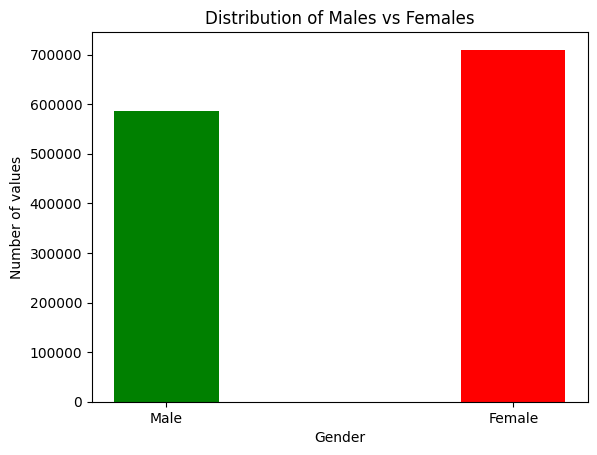

In [136]:
# calculating males and females in the dataset
males = cc_trans_df[cc_trans_df.gender == 'M'].shape[0]
females = cc_trans_df[cc_trans_df.gender == 'F'].shape[0]
# plotting a bar graph
labels_sex=['Male', 'Female']
sex_distribution = [males, females]
print('The Number of Males and Females in the credit card transaction dataset are:\n', sex_distribution)
fig, ax = plt.subplots(1,1)
width = 0.3
ax.bar(labels_sex,sex_distribution, width, color =['green', 'red'])
ax.set_xlabel('Gender')
ax.set_ylabel('Number of values')
ax.set_title('Distribution of Males vs Females')
plt.show()

#### Distribution of dataset according to state wise transactions

The number of cases from each category


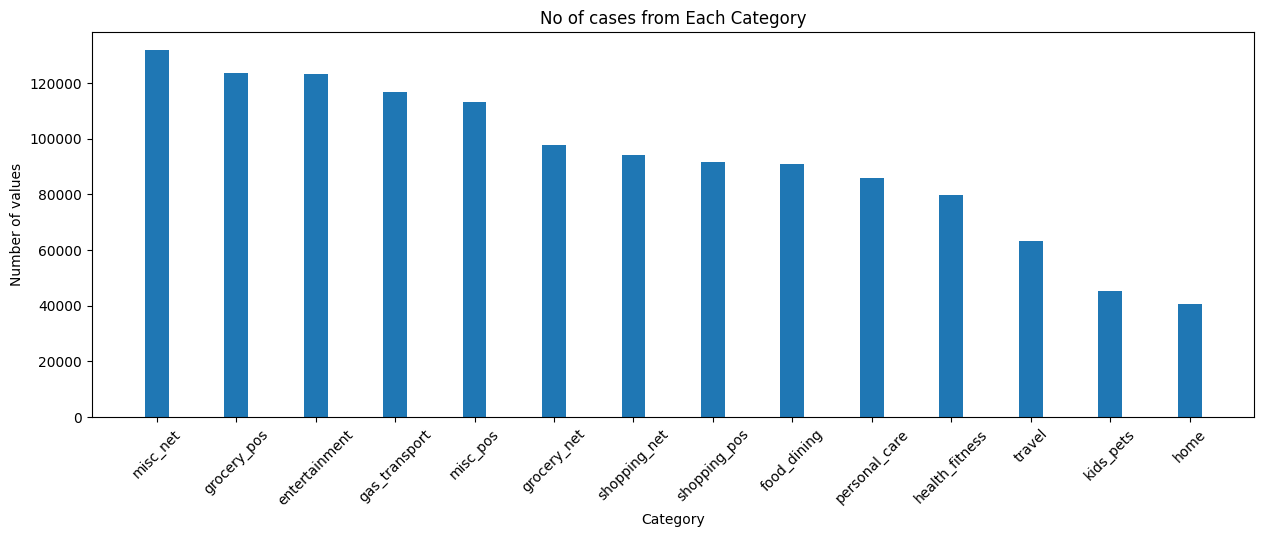

In [137]:
# calculating the different type of categories
count_category = cc_trans_df.category.value_counts().to_list()
labels_category = cc_trans_df.category.unique()
print('The number of cases from each category')
# plotting a bar chart
fig, ax = plt.subplots(figsize=(15,5))
width = 0.3
ax.bar(labels_category,count_category, width)
ax.set_xlabel('Category')
ax.set_xticklabels(labels_category,rotation = 45)
ax.set_ylabel('Number of values')
ax.set_title('No of cases from Each Category')
plt.show()

#### Distribution of dataset according to state wise transactions

The no of values from each state:

state
TX    94876
NY    83501
PA    79847
CA    56360
OH    46480
MI    46154
IL    43252
FL    42671
AL    40989
MO    38403
MN    31714
AR    31127
NC    30266
WI    29368
VA    29250
SC    29190
KY    28475
IN    27580
IA    26985
OK    26671
MD    26193
GA    26063
WV    25691
NJ    24603
NE    24168
KS    22996
MS    21188
LA    20965
WY    19322
WA    18924
OR    18597
TN    17554
ME    16505
NM    16407
ND    14786
CO    13880
MA    12376
SD    12324
VT    11768
MT    11754
AZ    10770
UT    10699
NH     8278
CT     7702
NV     5607
ID     5545
DC     3613
HI     2559
AK     2120
RI      550
DE        9
Name: count, dtype: int64


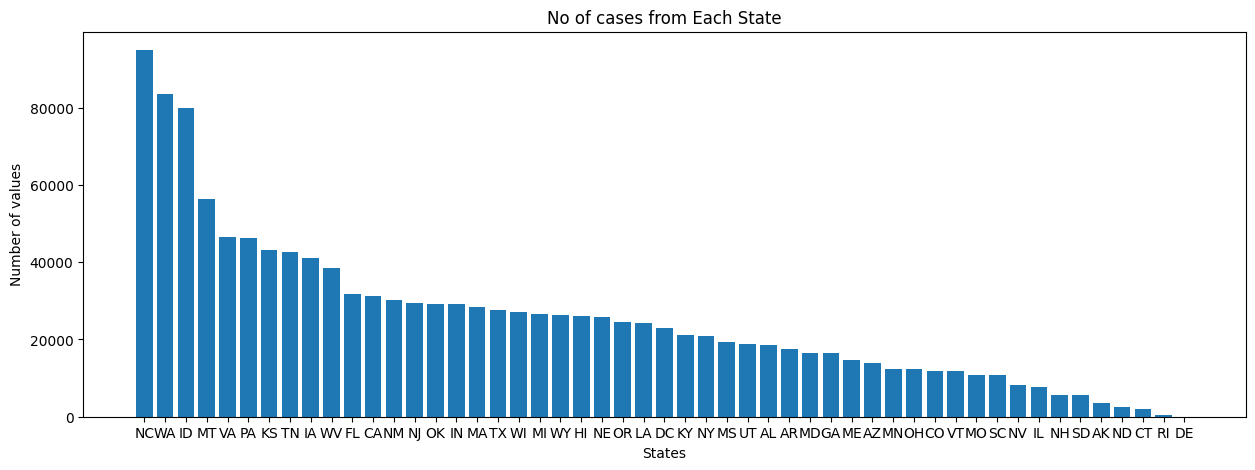

In [138]:
count_state = cc_trans_df.state.value_counts().to_list()
labels_state = cc_trans_df.state.unique()
print('The no of values from each state:\n')
print(cc_trans_df.state.value_counts())
# plotting a bar chart
fig, ax = plt.subplots(figsize=(15,5))
width = 0.3
ax.bar(labels_state,count_state)
ax.set_xlabel('States')
ax.set_ylabel('Number of values')
ax.set_title('No of cases from Each State')
plt.show()

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is important because it allows you to understand the structure, trends, and possible concerns of your data before making any assumptions or creating models. It serves as the basis for formulating precise hypotheses, choosing pertinent characteristics, and spotting issues with data quality.

#### Fraud and Non Fraud Cases in the dataset according to gender

The Number of Non-Fraud and Fraud cases in Males and Females are:

The Non-Fraud Cases (male, female): [583041, 706128]

The Fraud Cases (male, female): [3771, 3735]


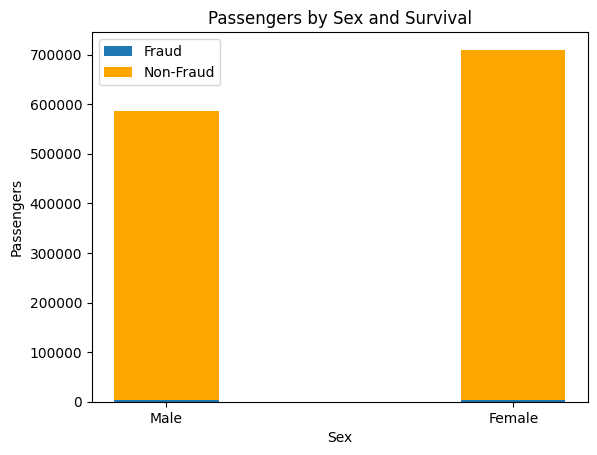

In [139]:
# calculating number of fraud transcations done by the males and females
labels_sex=['Male', 'Female']
male_fraud_cases = cc_trans_df.loc[(cc_trans_df.is_fraud == 1) & (cc_trans_df.gender == 'M')].shape[0]
male_non_fraud_cases = cc_trans_df.loc[(cc_trans_df.is_fraud == 0) & (cc_trans_df.gender == 'M')].shape[0]

female_fraud_cases = cc_trans_df.loc[(cc_trans_df.is_fraud == 1) & (cc_trans_df.gender == 'F')].shape[0]
female_non_fraud_cases = cc_trans_df.loc[(cc_trans_df.is_fraud == 0) & (cc_trans_df.gender == 'F')].shape[0]

sex_non_fraud = [male_non_fraud_cases, female_non_fraud_cases]
sex_fraud = [male_fraud_cases, female_fraud_cases]
print('The Number of Non-Fraud and Fraud cases in Males and Females are:\n')
print('The Non-Fraud Cases (male, female):',sex_non_fraud)
print('\nThe Fraud Cases (male, female):',sex_fraud)

# plotting a graph
fig, ax = plt.subplots(1,1)
width = 0.3
ax.bar(labels_sex,sex_fraud , width, label='Fraud',color='tab:blue')
ax.bar(labels_sex, sex_non_fraud, width, bottom=sex_fraud,label='Non-Fraud',color='orange')
ax.set_xlabel('Sex')
ax.set_ylabel('Passengers')
ax.set_title('Passengers by Sex and Survival')
ax.legend()
plt.show()

#### Fraud and Non Fraud cases according to State

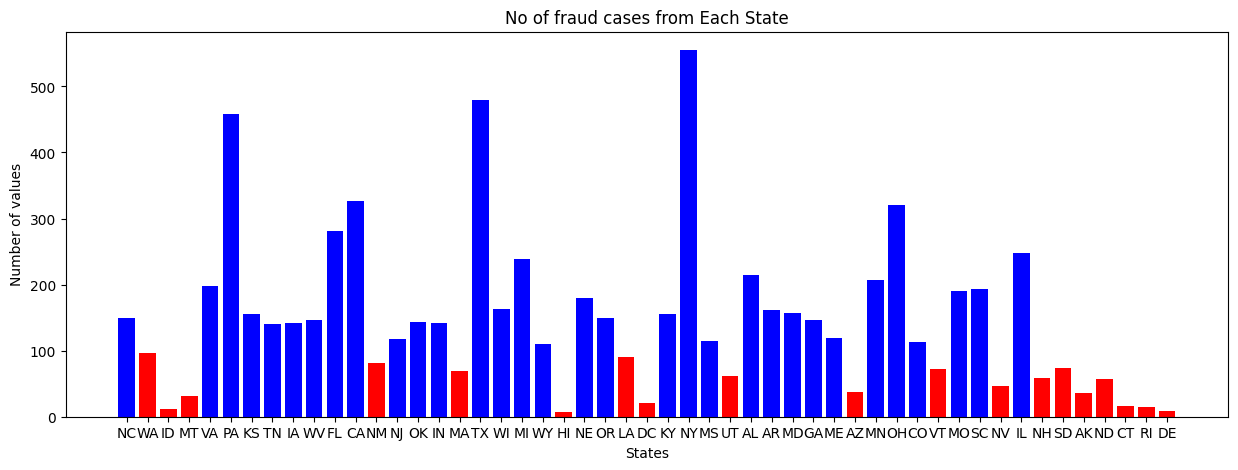

In [140]:
# cal culatting number of fraud transaction happended according to state wise
fraud_trans_state = {}
non_fraud_trans_state = {}
state_list = labels_state.tolist()
for state_name in state_list:
    fraud_trans_state[f'{state_name}'] = cc_trans_df.loc[(cc_trans_df.is_fraud == 1) & (cc_trans_df.state == f'{state_name}')].shape[0]
    non_fraud_trans_state[f'{state_name}'] = cc_trans_df.loc[(cc_trans_df.is_fraud == 0) & (cc_trans_df.state == f'{state_name}')].shape[0]
    
# plotting a bar graph
fig, ax = plt.subplots(figsize=(15,5))
colors  = ['red' if count < 100 else 'blue' for count in fraud_trans_state.values()]
ax.bar(fraud_trans_state.keys(),fraud_trans_state.values(), color = colors)
ax.set_xlabel('States')
ax.set_ylabel('Number of values')
ax.set_title('No of fraud cases from Each State')
plt.show()

#### Distribution of Fraud and Non Fraud cases according to amount

The highest transaction amount is:  28948.9
The Lowest transaction amount is:  1.0


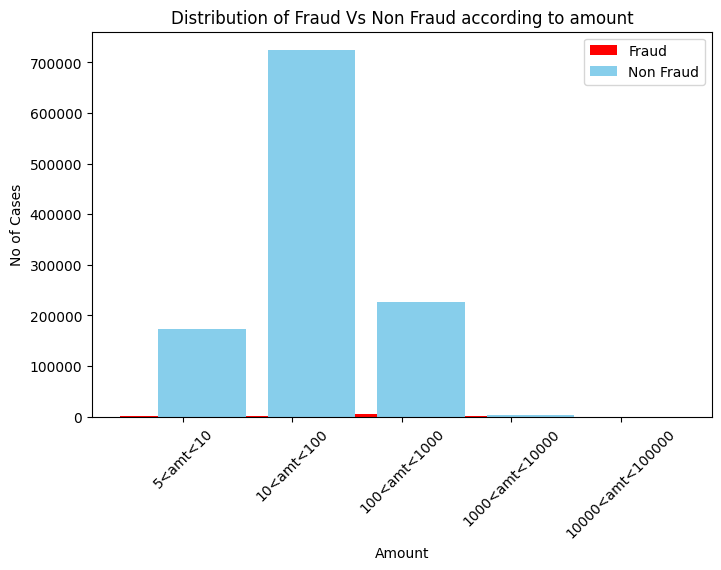

In [141]:
# calculating  the fraud transactions according to account value
print('The highest transaction amount is: ', cc_trans_df.amt.max())
print('The Lowest transaction amount is: ', cc_trans_df.amt.min())
fraud_amt =[]
non_fraud_amt = []
fraud_amt.append(cc_trans_df.loc[((cc_trans_df.amt > 5)&(cc_trans_df.amt < 10))&(cc_trans_df.is_fraud == 1)].shape[0])
fraud_amt.append(cc_trans_df.loc[((cc_trans_df.amt > 10)&(cc_trans_df.amt < 100))&(cc_trans_df.is_fraud == 1)].shape[0])
fraud_amt.append(cc_trans_df.loc[((cc_trans_df.amt > 100)&(cc_trans_df.amt < 1000))&(cc_trans_df.is_fraud == 1)].shape[0])
fraud_amt.append(cc_trans_df.loc[((cc_trans_df.amt > 1000)&(cc_trans_df.amt < 10000))&(cc_trans_df.is_fraud == 1)].shape[0])
fraud_amt.append(cc_trans_df.loc[((cc_trans_df.amt > 10000)&(cc_trans_df.amt < 100000))&(cc_trans_df.is_fraud == 1)].shape[0])

non_fraud_amt.append(cc_trans_df.loc[((cc_trans_df.amt > 5)&(cc_trans_df.amt < 10))&(cc_trans_df.is_fraud == 0)].shape[0])
non_fraud_amt.append(cc_trans_df.loc[((cc_trans_df.amt > 10)&(cc_trans_df.amt < 100))&(cc_trans_df.is_fraud == 0)].shape[0])
non_fraud_amt.append(cc_trans_df.loc[((cc_trans_df.amt > 100)&(cc_trans_df.amt < 1000))&(cc_trans_df.is_fraud == 0)].shape[0])
non_fraud_amt.append(cc_trans_df.loc[((cc_trans_df.amt > 1000)&(cc_trans_df.amt < 10000))&(cc_trans_df.is_fraud == 0)].shape[0])
non_fraud_amt.append(cc_trans_df.loc[((cc_trans_df.amt > 10000)&(cc_trans_df.amt < 100000))&(cc_trans_df.is_fraud == 0)].shape[0])

label_amt = ['5<amt<10','10<amt<100','100<amt<1000','1000<amt<10000','10000<amt<100000']

# plotting a graph
ran = np.arange(len(label_amt))
width = 0.35
fig, ax =plt.subplots(figsize=(8,5))

bar1 = ax.bar((ran-width/2), fraud_amt , label= 'Fraud' , color = 'red')
bar2 = ax.bar((ran+width/2), non_fraud_amt , label= 'Non Fraud' , color = 'skyblue')

ax.set_xlabel('Amount')
ax.set_ylabel('No of Cases')
ax.set_xticks(ran)
ax.set_xticklabels(label_amt, rotation = 45)
ax.set_title('Distribution of Fraud Vs Non Fraud according to amount')
ax.legend()
plt.show()

#### Fraud cases according to cc_num

In [142]:
# fraud transaction done by most in an account
cc_num_list = cc_trans_df.cc_num.unique().tolist()

fraud_cc_num = {}
for c_num in cc_num_list: 
    fraud_cc_num[f'{c_num}'] = cc_trans_df.loc[(cc_trans_df.is_fraud == 1) & (cc_trans_df.cc_num == c_num)].shape[0]

sorted_cc_num_list = sorted(fraud_cc_num.items(), key = lambda x: x[1], reverse = True)[:10]

top_cc_num_label = [num_cc for num_cc, num_c_value in sorted_cc_num_list]

total_cc_num = {}
for c_num in top_cc_num_label:
    total_cc_num[f'{c_num}'] = cc_trans_df.loc[cc_trans_df.cc_num == int(c_num)].shape[0]

print('\nThe Top Ten rpeated Fraud Transaction Account numbers:')
print(sorted_cc_num_list)



The Top Ten rpeated Fraud Transaction Account numbers:
[('3520550088202337', 19), ('4593569795412', 19), ('4260128500325', 18), ('30074693890476', 16), ('2720433095629877', 16), ('4400011257587661852', 16), ('3575540972310993', 16), ('3556613125071656', 16), ('6538891242532018', 16), ('3576021480694169', 16)]


# Data Preprocessing 

Checking for NaN values in the dataset and removing those rows from the dataset

In [143]:
print('Missing value in each column\n')
print(cc_trans_df.isnull().sum())
print('\nRemoving NaN value rows from the dataset')
cc_trans_df = cc_trans_df.dropna().reset_index(drop = True)
print('\nchecking again for missing value(NaN) values\n')
print(cc_trans_df.isnull().sum())

Missing value in each column

trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
dtype: int64

Removing NaN value rows from the dataset

checking again for missing value(NaN) values

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                     

From the above Exploratory Data Analysis(EDA), The number of cases where transaction amount greater than 10000 is very less and there are zero fraud cases in the that range so we are removing the values from that range

In [144]:
print('The number of rows before removing transaction amount greater than 10000: ', cc_trans_df.shape[0])

print('\nRemoving the rows where transaction amount is greater than 10000')

cc_trans_df = cc_trans_df[cc_trans_df.amt <10000]

print('\nThe number of rows after removing transaction amount > 10000: ', cc_trans_df.shape[0])

cc_trans_df = cc_trans_df.reset_index(drop= True)

The number of rows before removing transaction amount greater than 10000:  1100702

Removing the rows where transaction amount is greater than 10000

The number of rows after removing transaction amount > 10000:  1100673


#### Removing Personal information of individuals i.e(name, date of birth, street) from the dataset

In [145]:
# dropping unnecessary columns from the dataset
cc_trans_df = cc_trans_df.drop(columns=['first','last','dob','street'])

print('The columns present in the dataset after removing')
print(cc_trans_df.columns)

The columns present in the dataset after removing
Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'merch_zipcode'],
      dtype='object')


## Feature Engineering

For this task we are going to calculate time base features from transaction date time columns

Checking when the transaction is occurred is it day time or night time and weekend or weekday

In [146]:
# converting date time column to datetime datetype
cc_trans_df['trans_date_time'] = pd.to_datetime(cc_trans_df['trans_date_trans_time'])

cc_trans_df = cc_trans_df.drop(columns='trans_date_trans_time')
# calculating when the transaction is happended weekday or weekend
cc_trans_df['day_of_the_week'] = cc_trans_df['trans_date_time'].dt.dayofweek

print('the number of transactions happend in weekdays(0 to 4) and weekends(5 and 6): ' )
print(cc_trans_df['day_of_the_week'].value_counts())

#calculating when the transaction happended night or day time

cc_trans_df['trans_hour'] = cc_trans_df['trans_date_time'].dt.hour

cc_trans_df['is_day_night'] = cc_trans_df['trans_hour'].apply(lambda x: 1 if ((x>=9) & (x<=18)) else 0)

print('\nThe number of transactions happend in Night time: ')
print(cc_trans_df.loc[cc_trans_df.is_day_night == 0].shape[0])
print('\nThe number of transactions happend in Day time: ')
print(cc_trans_df.loc[cc_trans_df.is_day_night == 1].shape[0])


the number of transactions happend in weekdays(0 to 4) and weekends(5 and 6): 
day_of_the_week
0    215704
6    212743
5    170626
1    135955
4    129188
3    125203
2    111254
Name: count, dtype: int64

The number of transactions happend in Night time: 
604791

The number of transactions happend in Day time: 
495882


#### Distributionn of numerical feature and categorical features

In [147]:
numrical_features = ['cc_num', 'amt', 'zip','lat','long','city_pop','unix_time','merch_lat','merch_long','merch_zipcode']
categorical_features = ['merchant','category','gender','city','state','job','trans_num']

# Converting Categorical features into numerical features 

As machine learning models won't take the categorical features as training data so, we convert categorical data into numerical data

We can do this conversion in different ways namely onehotencoder, label encoder, for this task we are using **label encoder**

In [148]:
le = LabelEncoder()

for category in categorical_features:
    transform_feature = le.fit_transform(cc_trans_df[f'{category}'])
    # dropping the column from the dataset
    cc_trans_df = cc_trans_df.drop(columns=f'{category}')
    # adding the transformed data into dataset
    cc_trans_df[f'{category}'] = transform_feature
    

Spliting features to X and Y 

In [149]:
features = ['cc_num','amt','zip','lat','long','city_pop','unix_time','merch_lat','merch_long','merch_zipcode','merchant','category','gender','city','state','job','trans_num','day_of_the_week','is_day_night']

X = cc_trans_df[features] 

Y = cc_trans_df['is_fraud']

#### Correlation matrix

As correlation matrix helps us understand better the relationship between the features in the dataset

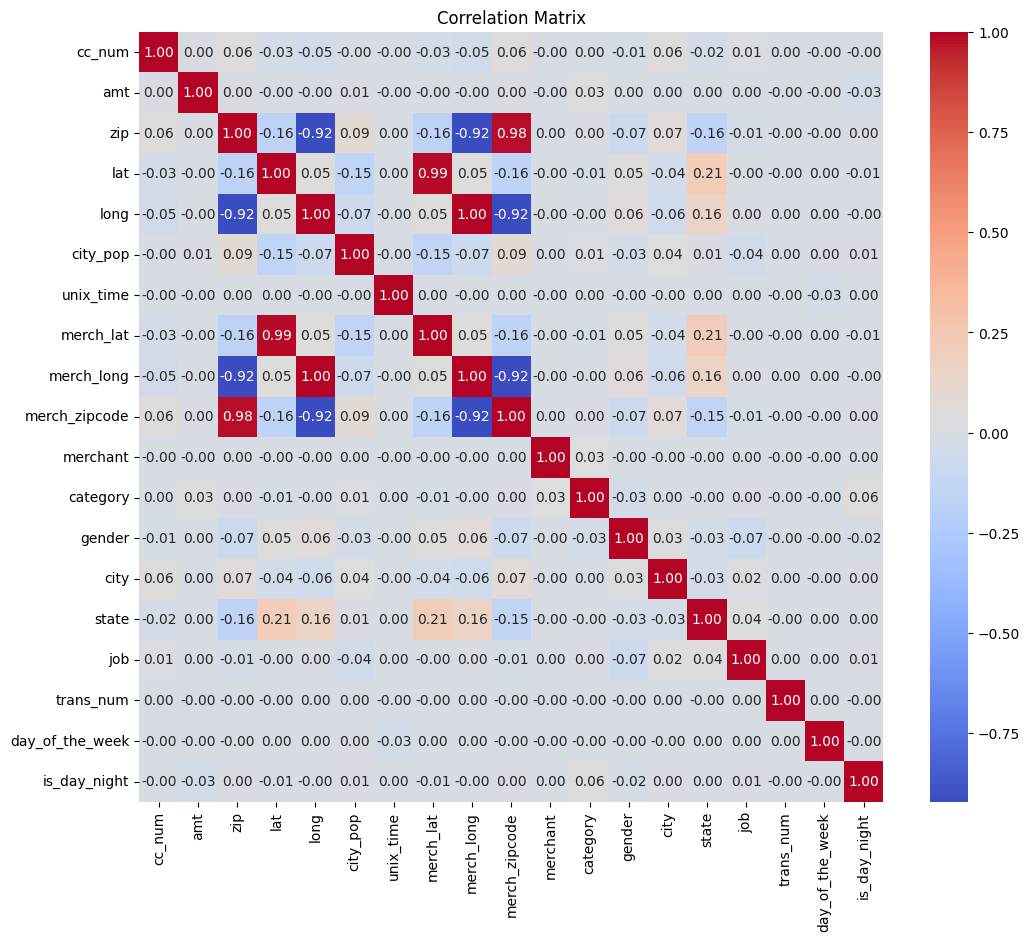

In [150]:
cor_matrix = X.corr() 
# ploting a correlation matrix between all the features
plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### Normalization of Data 

We are doing Normalization to make all the feature in same range 

In [151]:
# Label encoding to convert categorical fetures to numerical features
standard = StandardScaler()
X_scaled = standard.fit_transform(X)

print('Preview of the data after normalization')
print(X_scaled)

Preview of the data after normalization
[[-0.31624645 -0.46944075 -0.69466807 ... -1.58090848 -0.94235436
  -0.90549595]
 [-0.31828447  1.08742917  1.40961406 ...  0.4551155  -0.94235436
  -0.90549595]
 [-0.31802694 -0.20176101 -0.85735123 ...  0.48838831 -0.94235436
  -0.90549595]
 ...
 [-0.31562558  0.26116066  1.60513447 ... -0.75417737  1.33252009
   1.10436717]
 [-0.31623358  0.03661072  0.4269631  ...  1.17032982  1.33252009
   1.10436717]
 [ 2.96544593 -0.47428923  0.50847811 ...  0.20909436  1.33252009
   1.10436717]]


#### Spliting the dataset into training and testing data

In [152]:
X_train , X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.25, random_state = 42)

# XGBoost Model

In [153]:
# Initilazing the XGBboost model
XGBmodel = XGBClassifier(n_estimators = 100, max_depth = 15, learning_rate = 1, objective ='binary:logistic', n_jobs= 10)
XGBmodel.fit(X_train, y_train)
y_pred = XGBmodel.predict(X_test)

#### Classification report and Confusion matrix

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    273545
           1       0.78      0.64      0.70      1624

    accuracy                           1.00    275169
   macro avg       0.89      0.82      0.85    275169
weighted avg       1.00      1.00      1.00    275169

[[273250    295]
 [   586   1038]]


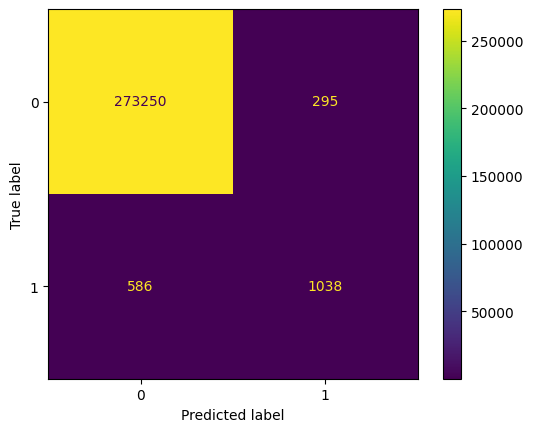

In [154]:
# Evaluation of the model
clc_report = classification_report(y_test, y_pred)
con_matrix = confusion_matrix(y_test, y_pred)

print(clc_report)
print(con_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix = con_matrix, display_labels = XGBmodel.classes_)
disp.plot()
plt.show()

#### ROC - AUC Graph

The ROC_AUC score value is:
0.9660841830222727


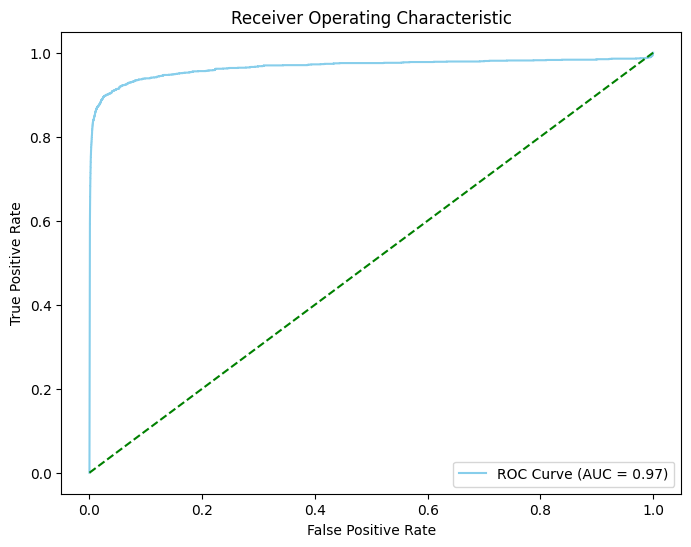

In [155]:
y_pred_proba = XGBmodel.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

print('The ROC_AUC score value is:')
print(roc_auc)
# plotting area under the curve graph
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(fpr, tpr, color='skyblue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
ax.plot([0, 1], [0, 1], color='green', linestyle='--')

ax.set_title('Receiver Operating Characteristic')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.legend()
plt.show()

# XGBoost Model with Class weights

the dataset which we have is a imbalanced dataset

If the dataset is imbalanced the general approach are oversampling, undersampling and using class weights

for this task we are using **class weights**

In [156]:
# calculating class weights 
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
# Initilazing the XGBboost model
XGBmodel = XGBClassifier(n_estimators = 100, max_depth = 15, learning_rate = 1, objective ='binary:logistic', n_jobs= 10)
XGBmodel.fit(X_train, y_train, sample_weight= sample_weights)
y_pred = XGBmodel.predict(X_test)

#### Classification report and Confusion matrix

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    273545
           1       0.78      0.81      0.80      1624

    accuracy                           1.00    275169
   macro avg       0.89      0.90      0.90    275169
weighted avg       1.00      1.00      1.00    275169

[[273185    360]
 [   310   1314]]


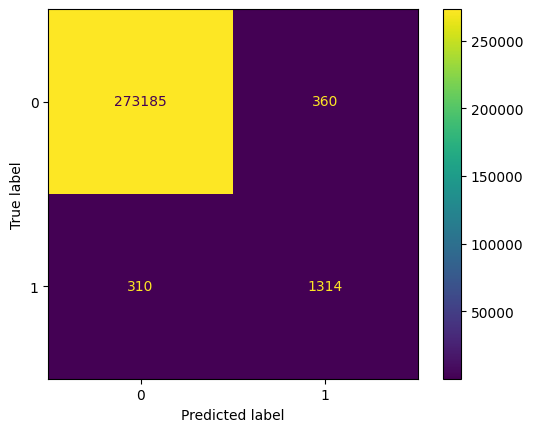

In [157]:
# Evaluation of the model
clc_report = classification_report(y_test, y_pred)
con_matrix = confusion_matrix(y_test, y_pred, labels= XGBmodel.classes_)
print(clc_report)
print(con_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix = con_matrix, display_labels = XGBmodel.classes_)
disp.plot()
plt.show()

#### ROC - AUC Graph

The ROC_AUC score value is:
0.9910891972367547


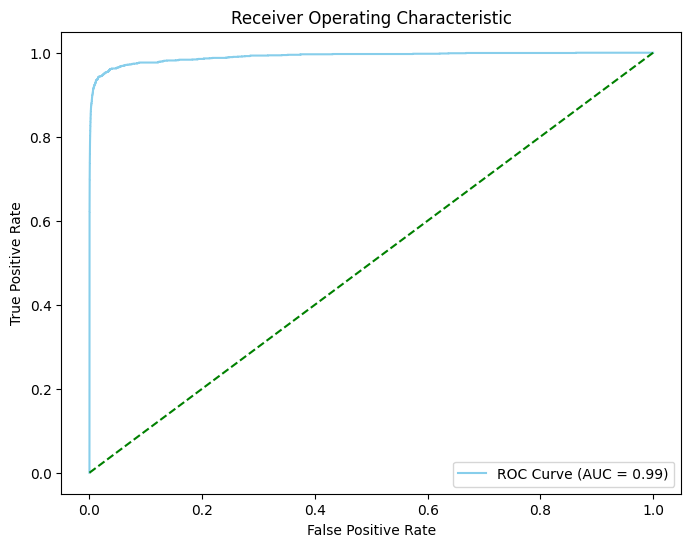

In [158]:
y_pred_proba = XGBmodel.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)
print('The ROC_AUC score value is:')
print(roc_auc)
# plotting ROC_AUC curve graph
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(fpr, tpr, color='skyblue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
ax.plot([0, 1], [0, 1], color='green', linestyle='--')

ax.set_title('Receiver Operating Characteristic')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.legend()

plt.show()

#### Feature Importance 

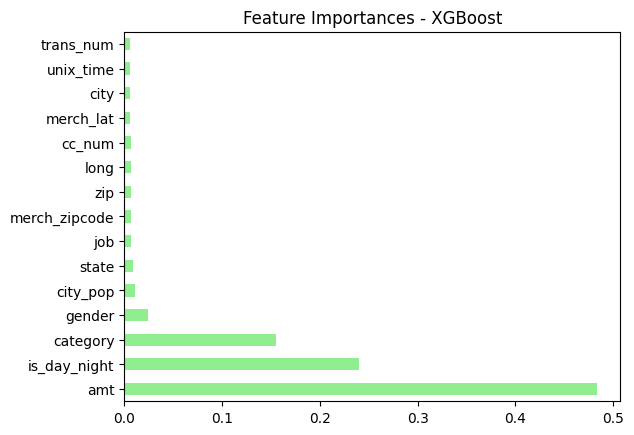

In [159]:
feature_importance = pd.Series(XGBmodel.feature_importances_, index=X.columns)
feature_importance.nlargest(15).plot(kind='barh', color = 'lightgreen')
plt.title("Feature Importances - XGBoost")
plt.show()

#### Cross Validation

In [160]:
# Checking for accuracy of the model

accuracy_results = cross_val_score(XGBmodel, X_scaled, Y , cv = 4, scoring = 'accuracy')
print('\nThe Accuracy scores from the Cross validation are: ')
print('Accuracy scores:', accuracy_results)

avg_accuracy_results = sum(accuracy_results)/len(accuracy_results)
print('\nThe average accuracy score of XGBmodel is:', avg_accuracy_results)

# checking for F1 score of the model
f1_score_results = cross_val_score(XGBmodel, X_scaled, Y , cv = 4, scoring = 'f1_macro')
print('\nThe F1 scores from the Cross validation are: ')
print('F1 Scores:', f1_score_results)

avg_f1_score_results = sum(f1_score_results)/len(f1_score_results)
print('\nThe average F1 score of XGBmodel is:', avg_f1_score_results)



The Accuracy scores from the Cross validation are: 
Accuracy scores: [0.82711352 0.99606786 0.99593703 0.99403637]

The average accuracy score of XGBmodel is: 0.9532886935312979

The F1 scores from the Cross validation are: 
F1 Scores: [0.47840916 0.76742031 0.75968198 0.77314898]

The average F1 score of XGBmodel is: 0.6946651089526178


As we can see the Accuracy and F1 score is very less in the first fold as less fraud transaction data is present on that fold 
a part from that all the other fold provided results very close to our model prediction.

The average accuracy score and average F1 score for the XGBoost model is 0.95 and 0.69 respectively.

# ANN(Artifical Neural Network)

In [166]:
# Building a feed forward neural network model
annmodel = Sequential()
input_dim = 19 # no of features
annmodel.add(layers.Dense(19, input_dim=input_dim, activation='relu'))
annmodel.add(layers.Dense(9, activation='relu'))
annmodel.add(layers.Dense(1,activation = 'sigmoid'))
print(annmodel.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 19)                  │             380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 9)                   │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 570 (2.23 KB)

 Trainable params: 570 (2.23 KB)

 Non-trainable params: 0 (0.00 B)

None


#### Complie the model

In [167]:
annmodel.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

history = annmodel.fit(X_train, y_train, epochs=10, verbose=True, validation_split=0.25, batch_size=512)

Epoch 1/10
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8909 - loss: 0.2492 - val_accuracy: 0.9942 - val_loss: 0.0249
Epoch 2/10
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9944 - loss: 0.0234 - val_accuracy: 0.9943 - val_loss: 0.0227
Epoch 3/10
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9943 - loss: 0.0216 - val_accuracy: 0.9943 - val_loss: 0.0216
Epoch 4/10
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9944 - loss: 0.0208 - val_accuracy: 0.9946 - val_loss: 0.0206
Epoch 5/10
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9946 - loss: 0.0198 - val_accuracy: 0.9947 - val_loss: 0.0197
Epoch 6/10
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9948 - loss: 0.0188 - val_accuracy: 0.9949 - val_loss: 0.0188
Epoch 7/10
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9954 - loss: 0.0177 - val_accuracy: 0.9954 - val_loss: 0.0181
Epoch 8/10
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9956 - loss: 0.0176 -

The Accuracy of the training set:
Training Accuracy: 0.9959

The Accuracy of the Testing set:
Testing Accuracy:  0.9958


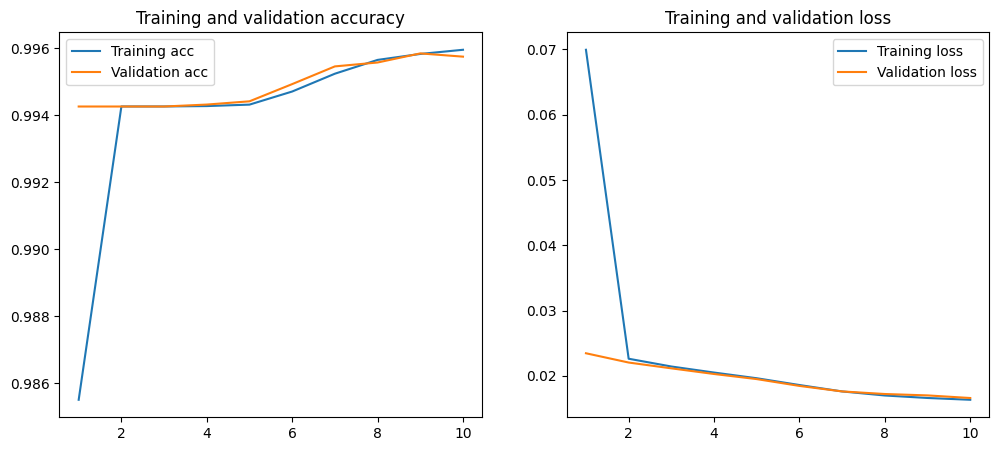

In [163]:
loss, accuracy = annmodel.evaluate(X_train, y_train, verbose=False)
print('The Accuracy of the training set:')
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = annmodel.evaluate(X_test, y_test, verbose=False)
print('\nThe Accuracy of the Testing set:')
print("Testing Accuracy:  {:.4f}".format(accuracy))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

# plotting graph for training and testing data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, label='Training acc')
plt.plot(x, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, label='Training loss')
plt.plot(x, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

8600/8600 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    273545
           1       0.73      0.47      0.57      1624

    accuracy                           1.00    275169
   macro avg       0.86      0.73      0.78    275169
weighted avg       1.00      1.00      1.00    275169

[[273260    285]
 [   860    764]]


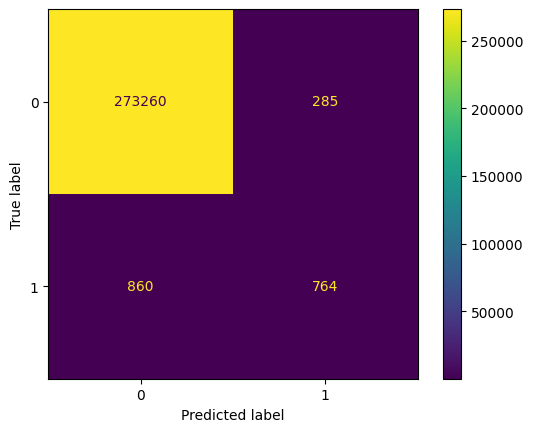

In [164]:
y_pred = annmodel.predict(X_test)
# Evaluation of the model
clc_report = classification_report(y_test, y_pred.round())
con_matrix = confusion_matrix(y_test, y_pred.round())
print(clc_report)
print(con_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix = con_matrix)
disp.plot()
plt.show()

8600/8600 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step
The ROC_AUC score value is:
0.9343962428800405


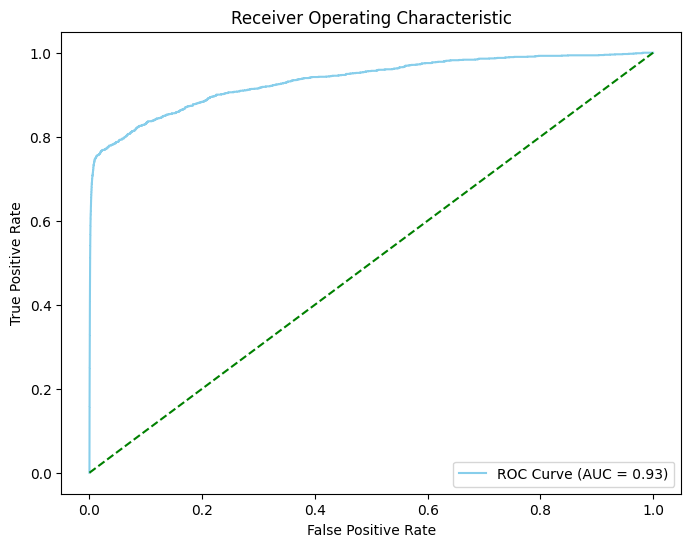

In [165]:
y_pred_proba = annmodel.predict(X_test).flatten()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)
print('The ROC_AUC score value is:')
print(roc_auc)
# plotting ROC_AUC curve graph
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(fpr, tpr, color='skyblue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
ax.plot([0, 1], [0, 1], color='green', linestyle='--')

ax.set_title('Receiver Operating Characteristic')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(loc='lower right')

plt.show()

# Conclusion

This Project demonstrated that machine learning and neural networks algorithms can be deployed for the detection of legitimate(fraud) transactions. we have taken real time transaction data from Hugging face website and did the Exploratory Data Analysis(EDA) and found that the dataset is an imbalanced dataset and some columns contain Null Value, so we removed rows with Null values.We have calculated date time based feature from the dataset, and converted categorical feature to numerical feature by label encoding, also did normalization of data as some value is large and some values is small.

We have divided the dataset into training and testing set(0.25) and employed XGBoost model without using class weight, latter using with class weight and feed forward neural network (ANN model)

Evaluation and results :

* XGBoost model(without class weight):
   * Accuracy : 1.00
   * F1 score : 0.70
   * ROC-AUC  : 0.97
* XGBoost model(with class weight):
   * Accuracy : 1.00
   * F1 score : 0.80
   * ROC-AUC  : 0.99
* ANN model :
    * Accuracy : 1.00
   * F1 score : 0.61
   * ROC-AUC  : 0.94

We have done the feature importance for the XGBoost model from that we can say **gender, category, is_night_day, amt features** play a key role in prediction of fradulent transactions.

From the cross validation we can say that our prediction is accurate in whole dataset.

We can improve the performance of XGBoost and Neural Networks by doing Gridparameter searching and finding the optimum parameter for model evaluation
